In [15]:
import pandas as pd
from math import ceil,sqrt
import scipy.stats as stats
import matplotlib.pyplot as plt

In [16]:
pd.set_option("display.max_rows",71)

## Attendence Cleaning Data

In [17]:
attendence = pd.read_csv("ATTENDANCE-Set1.csv",header=[0,1],skiprows=[68,69,70,71])

In [18]:
attendence.head()

,SLNo,CS1,DS,DM,PP,JP,ES,P-S,DS-JAVA LAB,PP LAB,PT,TOTAL,ATTEND
,Total Classes,57,55,51,47,57,30,55,42,45,22,461,100
0,1,34,48,36,31,35,21,40,33,36,12,326,70.72
1,2,53,47,43,45,50,29,50,36,45,18,416,90.24
2,3,37,36,33,32,39,17,37,27,33,8,299,64.86
3,4,41,45,41,38,47,25,43,36,42,16,374,81.13
4,5,40,37,37,35,40,25,44,30,39,14,341,73.97


## Mid Marks Cleaning Data

In [19]:
na_vals = ['A','AB']

In [20]:
mid_marks_uncleaned = pd.read_csv("MIDMARKS-Set1.csv",skiprows=[0,1,70,71,72,73],header=[0,1],na_values=na_vals).swaplevel(i=0,j=1,axis=1)

In [21]:
mid_marks_uncleaned.drop(["Unnamed: 11_level_1","Unnamed: 14_level_1","Unnamed: 15_level_1","Unnamed: 19_level_1","Unnamed: 20_level_1","Unnamed: 21_level_1","Unnamed: 22_level_1","Unnamed: 23_level_1","Unnamed: 27_level_1","Unnamed: 28_level_1"],axis=1,level=0,inplace=True)

In [22]:
mid_marks_uncleaned.head()

,Unnamed: 0_level_1,CS1,Unnamed: 2_level_1,Unnamed: 3_level_1,DS,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,Unnamed: 8_level_1,DM,Unnamed: 10_level_1,Unnamed: 12_level_1,PP,Unnamed: 16_level_1,Unnamed: 17_level_1,JP,Unnamed: 24_level_1,Unnamed: 25_level_1,P&S
,SL. No.,Mid-1,Mid-2,Mid-3,Mid-1,Mid-2,Mid-3,Mid-2,Mid-3,Mid-1,Mid-2,Mid-3,Mid-1,Mid-2,Mid-3,Mid-1,Mid-2,Mid-3,Mid-1
0,1,16.5,NaN,NaN,19.0,NaN,NaN,19.0,NaN,17.0,15.0,NaN,16.0,19.0,NaN,16.0,NaN,NaN,16.0
1,2,9.5,NaN,NaN,11.0,NaN,NaN,13.0,NaN,13.0,12.0,NaN,15.0,17.0,NaN,11.0,14.0,NaN,15.0
2,3,9.0,NaN,NaN,11.0,NaN,NaN,12.0,NaN,13.0,6.0,NaN,14.0,13.0,13.0,5.0,17.0,NaN,12.0
3,4,17.0,NaN,NaN,20.0,NaN,NaN,20.0,NaN,20.0,18.0,NaN,17.0,20.0,NaN,18.0,20.0,NaN,18.0
4,5,10.0,NaN,NaN,15.0,NaN,NaN,12.0,NaN,17.0,17.0,NaN,11.0,11.0,16.0,11.0,17.0,NaN,15.0


In [23]:
col1 = mid_marks_uncleaned.loc[:,'DM']
col2 = mid_marks_uncleaned.loc[:,'PP']
col3 = mid_marks_uncleaned.loc[:,'JP']
col4 = mid_marks_uncleaned.loc[:,'P&S']

In [24]:
mid_marks_uncleaned.drop(['DM','PP','JP','P&S'],axis=1,level=0,inplace=True)

In [25]:
mid_marks_uncleaned.insert(7,('DM','Mid-1'),col1)
mid_marks_uncleaned.insert(10,('PP','Mid-1'),col2)
mid_marks_uncleaned.insert(13,('JP','Mid-1'),col3)
mid_marks_uncleaned.insert(16,('P&S','Mid-1'),col4)

In [26]:
mid_marks_uncleaned.head()

,Unnamed: 0_level_1,CS1,Unnamed: 2_level_1,Unnamed: 3_level_1,DS,Unnamed: 5_level_1,Unnamed: 6_level_1,DM,Unnamed: 7_level_1,Unnamed: 8_level_1,PP,Unnamed: 10_level_1,Unnamed: 12_level_1,JP,Unnamed: 16_level_1,Unnamed: 17_level_1,P&S,Unnamed: 24_level_1,Unnamed: 25_level_1
,SL. No.,Mid-1,Mid-2,Mid-3,Mid-1,Mid-2,Mid-3,Mid-1,Mid-2,Mid-3,Mid-1,Mid-2,Mid-3,Mid-1,Mid-2,Mid-3,Mid-1,Mid-2,Mid-3
0,1,16.5,NaN,NaN,19.0,NaN,NaN,17.0,19.0,NaN,16.0,15.0,NaN,16.0,19.0,NaN,16.0,NaN,NaN
1,2,9.5,NaN,NaN,11.0,NaN,NaN,13.0,13.0,NaN,15.0,12.0,NaN,11.0,17.0,NaN,15.0,14.0,NaN
2,3,9.0,NaN,NaN,11.0,NaN,NaN,13.0,12.0,NaN,14.0,6.0,NaN,5.0,13.0,13.0,12.0,17.0,NaN
3,4,17.0,NaN,NaN,20.0,NaN,NaN,20.0,20.0,NaN,17.0,18.0,NaN,18.0,20.0,NaN,18.0,20.0,NaN
4,5,10.0,NaN,NaN,15.0,NaN,NaN,17.0,12.0,NaN,11.0,17.0,NaN,11.0,11.0,16.0,15.0,17.0,NaN


In [27]:
ind = mid_marks_uncleaned.iloc[:,0]
mid_marks_uncleaned.drop(columns=[('Unnamed: 0_level_1', 'SL. No.')],axis=1,inplace=True)

In [28]:
cols = pd.MultiIndex.from_product([["CS1","DS","DM","PP","JP","P&S"],["Mid-1","Mid-2","Mid3"]])
mid_marks_uncleaned.columns = cols
mid_marks_uncleaned.insert(0,'SL. No.',ind)

In [29]:
mid_marks_cleaned = mid_marks_uncleaned.copy(deep=True)

In [30]:
mid_marks_cleaned.fillna(0,inplace=True)

In [31]:
mid_marks_cleaned.head()

SL. No.   CS1               DS               DM               PP             \
          Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3   
0       1  16.5   0.0  0.0  19.0   0.0  0.0  17.0  19.0  0.0  16.0  15.0  0.0   
1       2   9.5   0.0  0.0  11.0   0.0  0.0  13.0  13.0  0.0  15.0  12.0  0.0   
2       3   9.0   0.0  0.0  11.0   0.0  0.0  13.0  12.0  0.0  14.0   6.0  0.0   
3       4  17.0   0.0  0.0  20.0   0.0  0.0  20.0  20.0  0.0  17.0  18.0  0.0   
4       5  10.0   0.0  0.0  15.0   0.0  0.0  17.0  12.0  0.0  11.0  17.0  0.0   

     JP               P&S             
  Mid-1 Mid-2  Mid3 Mid-1 Mid-2 Mid3  
0  16.0  19.0   0.0  16.0   0.0  0.0  
1  11.0  17.0   0.0  15.0  14.0  0.0  
2   5.0  13.0  13.0  12.0  17.0  0.0  
3  18.0  20.0   0.0  18.0  20.0  0.0  
4  11.0  11.0  16.0  15.0  17.0  0.0

In [32]:
mid_marks_cleaned.to_csv("Mid-Marks-Cleanend.csv",index=False)

In [33]:
df = pd.read_csv("Mid-Marks-Cleanend.csv",header=[0,1])

In [34]:
sno = df.iloc[:,0]
df.drop(columns=df.columns[0],inplace=True)
df.insert(0,"SL. No.",sno)

In [35]:
df.head()

SL. No.   CS1               DS               DM               PP             \
          Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3   
0       1  16.5   0.0  0.0  19.0   0.0  0.0  17.0  19.0  0.0  16.0  15.0  0.0   
1       2   9.5   0.0  0.0  11.0   0.0  0.0  13.0  13.0  0.0  15.0  12.0  0.0   
2       3   9.0   0.0  0.0  11.0   0.0  0.0  13.0  12.0  0.0  14.0   6.0  0.0   
3       4  17.0   0.0  0.0  20.0   0.0  0.0  20.0  20.0  0.0  17.0  18.0  0.0   
4       5  10.0   0.0  0.0  15.0   0.0  0.0  17.0  12.0  0.0  11.0  17.0  0.0   

     JP               P&S             
  Mid-1 Mid-2  Mid3 Mid-1 Mid-2 Mid3  
0  16.0  19.0   0.0  16.0   0.0  0.0  
1  11.0  17.0   0.0  15.0  14.0  0.0  
2   5.0  13.0  13.0  12.0  17.0  0.0  
3  18.0  20.0   0.0  18.0  20.0  0.0  
4  11.0  11.0  16.0  15.0  17.0  0.0

## Residence Cleaning Data

In [36]:
residence = pd.read_csv("RESIDENCE-SET-1.csv")

In [37]:
residence.head()

,Roll Number,Residence (Hostel/DayScholar),Hosteller is from Village/Town/City,Gender
0,1,D,C,F
1,2,H,V,F
2,3,D,C,M
3,4,H,T,M
4,5,H,V,M


## 1.  Girls from Village and Town , do they outshine the girls from City

In [38]:
filt_v_t_g = (residence['Hosteller is from Village/Town/City'].isin(['V','T'])) & (residence["Gender"] == 'F')

In [39]:
girls_v_t = residence[filt_v_t_g]

In [40]:
girls_v_t

,Roll Number,Residence (Hostel/DayScholar),Hosteller is from Village/Town/City,Gender
1,2,H,V,F
10,11,H,V,F
18,19,H,V,F
33,34,H,V,F


In [41]:
filt_c_g = (residence["Hosteller is from Village/Town/City"] == 'C') & (residence["Gender"] == 'F')

In [42]:
girls_c = residence[filt_c_g]

In [43]:
girls_c.head()

,Roll Number,Residence (Hostel/DayScholar),Hosteller is from Village/Town/City,Gender
0,1,D,C,F
7,8,D,C,F
11,12,D,C,F
12,13,D,C,F
20,21,H,C,F


In [44]:
vals_of_g_v_t = girls_v_t.index.values

In [45]:
table_g_v_t = mid_marks_cleaned.iloc[vals_of_g_v_t,:]

In [46]:
vals_of_g_c = girls_c.index.values

In [47]:
table_g_c = mid_marks_cleaned.iloc[vals_of_g_c,:]

In [48]:
table_g_v_t

SL. No.   CS1               DS               DM               PP        \
           Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2   
1        2   9.5   0.0  0.0  11.0   0.0  0.0  13.0  13.0  0.0  15.0  12.0   
10      11   7.0   0.0  0.0  12.0   0.0  0.0  19.0  18.0  0.0  17.0  14.0   
18      19  11.5   0.0  0.0  17.0   0.0  0.0  16.0  19.0  0.0  17.0  19.0   
33      34  16.0   0.0  0.0  15.0   0.0  0.0  17.0  19.0  0.0  16.0  18.0   

           JP              P&S             
   Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3  
1   0.0  11.0  17.0  0.0  15.0  14.0  0.0  
10  0.0  14.0  16.0  0.0  18.0  10.0  0.0  
18  0.0  15.0  17.0  0.0  17.0  17.0  0.0  
33  0.0  17.0  20.0  0.0  19.0  17.0  0.0

In [49]:
table_g_c.head()

SL. No.   CS1               DS               DM               PP        \
           Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2   
0        1  16.5   0.0  0.0  19.0   0.0  0.0  17.0  19.0  0.0  16.0  15.0   
7        8  16.5   0.0  0.0  18.0   0.0  0.0  14.0   0.0  0.0  19.0   0.0   
11      12  13.5   0.0  0.0  14.0   0.0  0.0  11.0  17.0  0.0  19.0  17.0   
12      13   9.5   0.0  0.0  11.0   0.0  0.0  17.0  17.0  0.0  17.0  15.0   
20      21  12.5   0.0  0.0  11.0   0.0  0.0  13.0  19.0  0.0  16.0  18.0   

           JP               P&S             
   Mid3 Mid-1 Mid-2  Mid3 Mid-1 Mid-2 Mid3  
0   0.0  16.0  19.0   0.0  16.0   0.0  0.0  
7   0.0  19.0   0.0  15.0  16.0   0.0  0.0  
11  0.0   1.0  17.0   0.0  15.0  13.0  0.0  
12  0.0  16.0  18.0   0.0  17.0  13.0  0.0  
20  0.0  10.0  14.0   0.0  15.0  12.0  0.0

In [50]:
village_town_df_g = pd.DataFrame()

In [51]:
def take_max(x1):
    x2 = list(x1)
    x2.sort(reverse=True)
    return ceil((x2[0]+x2[1])/2)

In [52]:
village_town_df_g["CS1 Avg"] = table_g_v_t["CS1"].apply(take_max,axis=1)
village_town_df_g["DS Avg"] = table_g_v_t["DS"].apply(take_max,axis=1)
village_town_df_g["DM Avg"] = table_g_v_t["DM"].apply(take_max,axis=1)
village_town_df_g["PP Avg"] = table_g_v_t["PP"].apply(take_max,axis=1)
village_town_df_g["JP Avg"] = table_g_v_t["JP"].apply(take_max,axis=1)
village_town_df_g["P&S Avg"] = table_g_v_t["P&S"].apply(take_max,axis=1)

In [53]:
village_town_df_g["Total"] = village_town_df_g.sum(axis=1)

In [54]:
village_town_df_g

,CS1 Avg,DS Avg,DM Avg,PP Avg,JP Avg,P&S Avg,Total
1,5,6,13,14,14,15,67
10,4,6,19,16,15,14,74
18,6,9,18,18,16,17,84
33,8,8,18,17,19,18,88


In [55]:
city_df_g = pd.DataFrame()

In [56]:
city_df_g["CS1 Avg"] = table_g_c["CS1"].apply(take_max,axis=1)
city_df_g["DS Avg"] = table_g_c["DS"].apply(take_max,axis=1)
city_df_g ["DM Avg"] = table_g_c["DM"].apply(take_max,axis=1)
city_df_g["PP Avg"] = table_g_c["PP"].apply(take_max,axis=1)
city_df_g["JP Avg"] = table_g_c["JP"].apply(take_max,axis=1)
city_df_g["P&S Avg"] = table_g_c["P&S"].apply(take_max,axis=1)

In [57]:
city_df_g["Total"] = city_df_g.sum(axis=1)

In [58]:
city_df_g.head()

,CS1 Avg,DS Avg,DM Avg,PP Avg,JP Avg,P&S Avg,Total
0,9,10,18,16,18,8,79
7,9,9,7,10,17,8,60
11,7,7,14,18,9,14,69
12,5,6,17,16,17,15,76
20,7,6,16,17,12,14,72


In [59]:
data_vt_g = village_town_df_g["Total"]
data_c_g = city_df_g["Total"]
n1_g = village_town_df_g.shape[0]
n2_g = city_df_g.shape[0]

In [60]:
city_df_g.shape

(15, 7)

In [61]:
village_town_df_g.shape

(4, 7)

In [62]:
city_df_g["Total"].mean()

69.2

In [63]:
village_town_df_g["Total"].mean()

78.25

* As the size of girls from village are very less than the size of girls from city, We cannot decide who performs better

* Still if we want to perform an analysis then we can do hypothesis testing using t-test

In [64]:
t, p = stats.ttest_ind(data_vt_g, data_c_g,equal_var=False,alternative="greater")
df = n1_g+n2_g-2
print("t(%g) = %g, p=%g"%(df,t,p))

t(17) = 1.46284, p=0.0914692


* For 5% level of significance the p value is 0.091.
* So as p value is greater than 0.05 we accept null hypothesis.
* Therefore Girls from village and town are not better than girls from city.

## 2.  Boys from Village and Town , do they outshine the boys from City

In [65]:
filt_v_t_b = (residence['Hosteller is from Village/Town/City'].isin(['V','T'])) & (residence["Gender"] == 'M')

In [66]:
boys_v_t = residence[filt_v_t_b]

In [67]:
boys_v_t.head()

,Roll Number,Residence (Hostel/DayScholar),Hosteller is from Village/Town/City,Gender
3,4,H,T,M
4,5,H,V,M
5,6,H,V,M
6,7,H,T,M
8,9,H,V,M


In [68]:
filt_c_b = (residence["Hosteller is from Village/Town/City"] == 'C') & (residence["Gender"] == 'M')

In [69]:
boys_c = residence[filt_c_b]

In [70]:
boys_c.head()

,Roll Number,Residence (Hostel/DayScholar),Hosteller is from Village/Town/City,Gender
2,3,D,C,M
9,10,D,C,M
13,14,D,C,M
15,16,D,C,M
16,17,D,C,M


In [71]:
vals_of_b_v_t = boys_v_t.index.values

In [72]:
table_b_v_t = mid_marks_cleaned.iloc[vals_of_b_v_t,:]

In [73]:
vals_of_b_c = boys_c.index.values

In [74]:
table_b_c = mid_marks_cleaned.iloc[vals_of_b_c,:]

In [75]:
table_b_v_t.head()

SL. No.   CS1               DS               DM               PP             \
          Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3   
3       4  17.0   0.0  0.0  20.0   0.0  0.0  20.0  20.0  0.0  17.0  18.0  0.0   
4       5  10.0   0.0  0.0  15.0   0.0  0.0  17.0  12.0  0.0  11.0  17.0  0.0   
5       6   2.5   0.0  0.0  20.0   0.0  0.0  13.0  13.0  0.0   9.0   6.0  0.0   
6       7  11.5   0.0  0.0  15.0   0.0  0.0  13.0  15.0  0.0  10.0  12.0  0.0   
8       9  11.0   0.0  0.0  18.0   0.0  0.0  17.0  17.0  0.0  14.0  15.0  0.0   

     JP               P&S             
  Mid-1 Mid-2  Mid3 Mid-1 Mid-2 Mid3  
3  18.0  20.0   0.0  18.0  20.0  0.0  
4  11.0  11.0  16.0  15.0  17.0  0.0  
5   6.0   7.0  13.0   9.0  12.0  0.0  
6   6.0  11.0  12.0   8.0  15.0  0.0  
8  13.0   9.0  14.0  15.0  15.0  0.0

In [76]:
village_town_df_b = pd.DataFrame()

In [77]:
village_town_df_b["CS1 Avg"] = table_b_v_t["CS1"].apply(take_max,axis=1)
village_town_df_b["DS Avg"] = table_b_v_t["DS"].apply(take_max,axis=1)
village_town_df_b["DM Avg"] = table_b_v_t["DM"].apply(take_max,axis=1)
village_town_df_b["PP Avg"] = table_b_v_t["PP"].apply(take_max,axis=1)
village_town_df_b["JP Avg"] = table_b_v_t["JP"].apply(take_max,axis=1)
village_town_df_b["P&S Avg"] = table_b_v_t["P&S"].apply(take_max,axis=1)

In [78]:
village_town_df_b["Total"] = village_town_df_b.sum(axis=1)

In [79]:
village_town_df_b.shape

(15, 7)

In [80]:
city_df_b = pd.DataFrame()

In [81]:
city_df_b["CS1 Avg"] = table_b_c["CS1"].apply(take_max,axis=1)
city_df_b["DS Avg"] = table_b_c["DS"].apply(take_max,axis=1)
city_df_b ["DM Avg"] = table_b_c["DM"].apply(take_max,axis=1)
city_df_b["PP Avg"] = table_b_c["PP"].apply(take_max,axis=1)
city_df_b["JP Avg"] = table_b_c["JP"].apply(take_max,axis=1)
city_df_b["P&S Avg"] = table_b_c["P&S"].apply(take_max,axis=1)

In [82]:
city_df_b.shape

(30, 6)

In [83]:
city_df_b["Total"] = city_df_b.sum(axis=1)

In [84]:
city_df_b.head()

,CS1 Avg,DS Avg,DM Avg,PP Avg,JP Avg,P&S Avg,Total
2,5,6,13,10,13,15,62
9,0,3,2,8,2,1,16
13,5,3,11,12,10,14,55
15,9,9,20,17,16,12,83
16,1,3,5,11,9,4,33


In [85]:
city_df_b["Total"].mean()

53.6

In [86]:
village_town_df_b["Total"].mean()

54.2

In [87]:
data_vt_b = village_town_df_b["Total"]
data_c_b = city_df_b["Total"]
n1_b = village_town_df_b.shape[0]
n2_b = city_df_b.shape[0]

* As the size of boys from village are less than the size of boys from city, We cannot decide who performs better.

* Still if we want to perform an analysis then

In [88]:
t, p = stats.ttest_ind(data_vt_b,data_c_b,equal_var=False,alternative="greater")
df = n1_b+n2_b-2
print("t(%g) = %g, p=%g"%(df,t,p))

t(43) = 0.0743874, p=0.470678


* For 5% level of significance the p value is 0.470.
* So as p value is lesser than 0.05 we reject null hypothesis.
* Therefore Boys from Village and town are better than Boys from City.

#  3.  Students from villages/town are they more regular than the City students

In [89]:
attendence.head()

,SLNo,CS1,DS,DM,PP,JP,ES,P-S,DS-JAVA LAB,PP LAB,PT,TOTAL,ATTEND
,Total Classes,57,55,51,47,57,30,55,42,45,22,461,100
0,1,34,48,36,31,35,21,40,33,36,12,326,70.72
1,2,53,47,43,45,50,29,50,36,45,18,416,90.24
2,3,37,36,33,32,39,17,37,27,33,8,299,64.86
3,4,41,45,41,38,47,25,43,36,42,16,374,81.13
4,5,40,37,37,35,40,25,44,30,39,14,341,73.97


In [90]:
residence.head()

,Roll Number,Residence (Hostel/DayScholar),Hosteller is from Village/Town/City,Gender
0,1,D,C,F
1,2,H,V,F
2,3,D,C,M
3,4,H,T,M
4,5,H,V,M


In [91]:
filt_v_t = residence["Hosteller is from Village/Town/City"].isin(['V','T'])

In [92]:
students_v_t = residence.loc[filt_v_t]

In [93]:
index_v_t = students_v_t.index.values

In [94]:
attendence_v_t = attendence.loc[index_v_t]

In [95]:
attendence_v_t["ATTEND"].mean()

100    74.883158
dtype: float64

In [96]:
filt_c = residence["Hosteller is from Village/Town/City"] == 'C'

In [97]:
students_c = residence.loc[filt_c]

In [98]:
index_c = students_c.index.values

In [99]:
attendence_c = attendence.loc[index_c]

In [100]:
print("Attendence of Village/Town Students: ",attendence_v_t["ATTEND"].mean())
print("Attendence of City Students: ",attendence_c["ATTEND"].mean())

Attendence of Village/Town Students:  100    74.883158
dtype: float64
Attendence of City Students:  100    77.92587
dtype: float64


* Students from city are more regular than village/town

# 4.  Students who are good in Maths are they good in programming skills? Is there any correlation between these two?

In [101]:
from math import ceil
import pandas as pd
%matplotlib inline

In [102]:
mid_marks_cleaned.head()

SL. No.   CS1               DS               DM               PP             \
          Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3   
0       1  16.5   0.0  0.0  19.0   0.0  0.0  17.0  19.0  0.0  16.0  15.0  0.0   
1       2   9.5   0.0  0.0  11.0   0.0  0.0  13.0  13.0  0.0  15.0  12.0  0.0   
2       3   9.0   0.0  0.0  11.0   0.0  0.0  13.0  12.0  0.0  14.0   6.0  0.0   
3       4  17.0   0.0  0.0  20.0   0.0  0.0  20.0  20.0  0.0  17.0  18.0  0.0   
4       5  10.0   0.0  0.0  15.0   0.0  0.0  17.0  12.0  0.0  11.0  17.0  0.0   

     JP               P&S             
  Mid-1 Mid-2  Mid3 Mid-1 Mid-2 Mid3  
0  16.0  19.0   0.0  16.0   0.0  0.0  
1  11.0  17.0   0.0  15.0  14.0  0.0  
2   5.0  13.0  13.0  12.0  17.0  0.0  
3  18.0  20.0   0.0  18.0  20.0  0.0  
4  11.0  11.0  16.0  15.0  17.0  0.0

In [103]:
def take_max(x1):
    x2 = list(x1)
    x2.sort(reverse=True)
    return ceil((x2[0]+x2[1])/2)

In [104]:
prog_jp = mid_marks_cleaned["JP"].apply(take_max,axis=1)

In [105]:
prog_pp = mid_marks_cleaned["PP"].apply(take_max,axis=1)

In [106]:
students_p = pd.concat([prog_jp,prog_pp],axis=1)

In [107]:
students_p.columns = ["JP Avg","PP Avg"]

In [108]:
prog = students_p.agg("mean",axis=1).apply(ceil)

In [109]:
math_dm = mid_marks_cleaned["DM"].apply(take_max,axis=1)

In [110]:
math_ps = mid_marks_cleaned["P&S"].apply(take_max,axis=1)

In [111]:
students_m = pd.concat([math_dm,math_ps], axis=1)

In [112]:
students_m.columns = ["DM Avg", "P&S Avg"]

In [113]:
students_m.head()

,DM Avg,P&S Avg
0,18,8
1,13,15
2,13,15
3,20,19
4,15,16


In [114]:
maths = students_m.agg("mean",axis=1).apply(ceil)

In [115]:
corr_df = pd.concat({"Maths":maths,"Programming":prog},axis=1)

In [116]:
corr_df.head()

,Maths,Programming
0,13,17
1,14,14
2,14,12
3,20,19
4,16,14


In [117]:
corr_df.corr(method='pearson')

,Maths,Programming
Maths,1.000000,0.887415
Programming,0.887415,1.000000


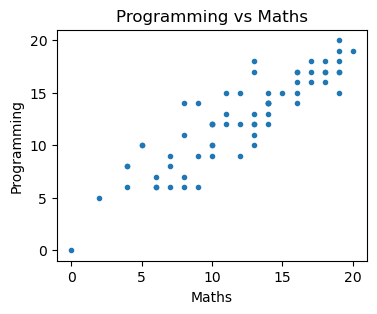

In [149]:
plt.figure(figsize=(4,3))
plt.scatter(corr_df["Maths"],corr_df["Programming"],marker='.')
plt.title("Programming vs Maths")
plt.xlabel("Maths")
plt.ylabel("Programming")
plt.savefig("correlation1.png")

* There is a positive correlation between Maths and Proggramming.
* So as marks of maths increases marks of programming also increases.

## 5.  Is Achieving good marks related to Good attendance percentage (> 75%)

In [119]:
mid_marks_cleaned.head()

SL. No.   CS1               DS               DM               PP             \
          Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3   
0       1  16.5   0.0  0.0  19.0   0.0  0.0  17.0  19.0  0.0  16.0  15.0  0.0   
1       2   9.5   0.0  0.0  11.0   0.0  0.0  13.0  13.0  0.0  15.0  12.0  0.0   
2       3   9.0   0.0  0.0  11.0   0.0  0.0  13.0  12.0  0.0  14.0   6.0  0.0   
3       4  17.0   0.0  0.0  20.0   0.0  0.0  20.0  20.0  0.0  17.0  18.0  0.0   
4       5  10.0   0.0  0.0  15.0   0.0  0.0  17.0  12.0  0.0  11.0  17.0  0.0   

     JP               P&S             
  Mid-1 Mid-2  Mid3 Mid-1 Mid-2 Mid3  
0  16.0  19.0   0.0  16.0   0.0  0.0  
1  11.0  17.0   0.0  15.0  14.0  0.0  
2   5.0  13.0  13.0  12.0  17.0  0.0  
3  18.0  20.0   0.0  18.0  20.0  0.0  
4  11.0  11.0  16.0  15.0  17.0  0.0

In [120]:
df_total_marks = pd.DataFrame()
df_below_75 = pd.DataFrame()
df_above_75 = pd.DataFrame()

In [121]:
def take_max(x1):
    x2 = list(x1)
    x2.sort(reverse=True)
    return ceil((x2[0]+x2[1])/2)

In [122]:
mid_marks_cleaned.head()

SL. No.   CS1               DS               DM               PP             \
          Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3 Mid-1 Mid-2 Mid3   
0       1  16.5   0.0  0.0  19.0   0.0  0.0  17.0  19.0  0.0  16.0  15.0  0.0   
1       2   9.5   0.0  0.0  11.0   0.0  0.0  13.0  13.0  0.0  15.0  12.0  0.0   
2       3   9.0   0.0  0.0  11.0   0.0  0.0  13.0  12.0  0.0  14.0   6.0  0.0   
3       4  17.0   0.0  0.0  20.0   0.0  0.0  20.0  20.0  0.0  17.0  18.0  0.0   
4       5  10.0   0.0  0.0  15.0   0.0  0.0  17.0  12.0  0.0  11.0  17.0  0.0   

     JP               P&S             
  Mid-1 Mid-2  Mid3 Mid-1 Mid-2 Mid3  
0  16.0  19.0   0.0  16.0   0.0  0.0  
1  11.0  17.0   0.0  15.0  14.0  0.0  
2   5.0  13.0  13.0  12.0  17.0  0.0  
3  18.0  20.0   0.0  18.0  20.0  0.0  
4  11.0  11.0  16.0  15.0  17.0  0.0

In [123]:
df_total_marks["CS1 Avg"] = mid_marks_cleaned["CS1"].apply(take_max,axis=1)
df_total_marks["DS Avg"] = mid_marks_cleaned["DS"].apply(take_max,axis=1)
df_total_marks["DM Avg"] = mid_marks_cleaned["DM"].apply(take_max,axis=1)
df_total_marks["PP Avg"] = mid_marks_cleaned["PP"].apply(take_max,axis=1)
df_total_marks["JP Avg"] = mid_marks_cleaned["JP"].apply(take_max,axis=1)
df_total_marks["P&S Avg"] = mid_marks_cleaned["P&S"].apply(take_max,axis=1)
df_total_marks["Total"] = df_total_marks.sum(axis=1)

In [124]:
df_total_marks.head()

,CS1 Avg,DS Avg,DM Avg,PP Avg,JP Avg,P&S Avg,Total
0,9,10,18,16,18,8,79
1,5,6,13,14,14,15,67
2,5,6,13,10,13,15,62
3,9,10,20,18,19,19,95
4,5,8,15,14,14,16,72


In [125]:
attendence.head()

,SLNo,CS1,DS,DM,PP,JP,ES,P-S,DS-JAVA LAB,PP LAB,PT,TOTAL,ATTEND
,Total Classes,57,55,51,47,57,30,55,42,45,22,461,100
0,1,34,48,36,31,35,21,40,33,36,12,326,70.72
1,2,53,47,43,45,50,29,50,36,45,18,416,90.24
2,3,37,36,33,32,39,17,37,27,33,8,299,64.86
3,4,41,45,41,38,47,25,43,36,42,16,374,81.13
4,5,40,37,37,35,40,25,44,30,39,14,341,73.97


In [126]:
df = pd.DataFrame({"Total":df_total_marks["Total"],
                    "Attendence":attendence[('ATTEND','100')]})

In [127]:
df.head()

,Total,Attendence
0,79,70.72
1,67,90.24
2,62,64.86
3,95,81.13
4,72,73.97


In [128]:
df.corr(method='pearson')

,Total,Attendence
Total,1.000000,0.612287
Attendence,0.612287,1.000000


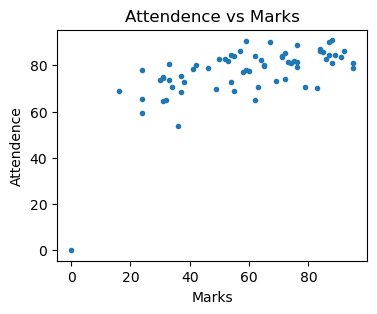

In [150]:
plt.figure(figsize=(4,3))
plt.scatter(df["Total"],df["Attendence"],marker=".");
plt.title("Attendence vs Marks")
plt.xlabel("Marks")
plt.ylabel("Attendence")
plt.savefig("correlation2.png")
plt.show()

* There is a positive correlation between Marks and Attendence.
* So as attendence increases marks also increases.

## 6. Who is more regular - girls or boys?

In [130]:
residence.head()

,Roll Number,Residence (Hostel/DayScholar),Hosteller is from Village/Town/City,Gender
0,1,D,C,F
1,2,H,V,F
2,3,D,C,M
3,4,H,T,M
4,5,H,V,M


In [131]:
attendence.head()

,SLNo,CS1,DS,DM,PP,JP,ES,P-S,DS-JAVA LAB,PP LAB,PT,TOTAL,ATTEND
,Total Classes,57,55,51,47,57,30,55,42,45,22,461,100
0,1,34,48,36,31,35,21,40,33,36,12,326,70.72
1,2,53,47,43,45,50,29,50,36,45,18,416,90.24
2,3,37,36,33,32,39,17,37,27,33,8,299,64.86
3,4,41,45,41,38,47,25,43,36,42,16,374,81.13
4,5,40,37,37,35,40,25,44,30,39,14,341,73.97


In [132]:
filt_for_F = residence["Gender"] == "F"

In [133]:
girls = attendence.loc[filt_for_F,('ATTEND','100')]
boys = attendence.loc[~filt_for_F,('ATTEND','100')]

In [134]:
girls.reset_index(drop=True,inplace=True)
boys.reset_index(drop=True,inplace=True)

In [135]:
print("Girls Attendence: ",girls.mean())
print("Boys Attendence: ",boys.mean())

Girls Attendence:  81.7221052631579
Boys Attendence:  75.10468085106385


* Girls are more regular than Boys